# Machine Learning
This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) using the past 60 days stock price of (Apple Inc)

In [191]:
# Initial imports
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [192]:
# Get the stock data using yahoo source
df = web.DataReader('AAPL', data_source='yahoo', start='2016-01-01', end='2021-01-13')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.400942
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.789471
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.323915
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.339539
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.457672
...,...,...,...,...,...,...
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,126.599998
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,130.919998
2021-01-08,132.630005,130.229996,132.429993,132.050003,104965400.0,132.050003


In [193]:
# Get the number of rows and columns in the data set
df.shape

(1266, 6)

<function matplotlib.pyplot.show(*args, **kw)>

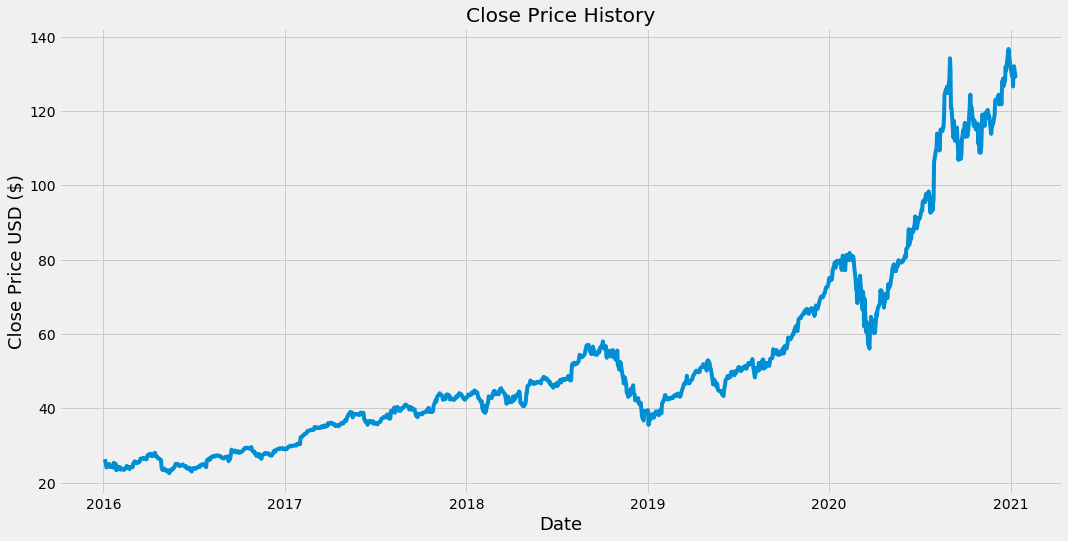

In [194]:
# Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show

In [195]:
# Create a new dataframe with only the 'Close Column'
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1013

In [196]:
# Scale the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03288638],
       [0.02710224],
       [0.02269839],
       ...,
       [0.95933571],
       [0.9324306 ],
       [0.93085317]])

In [197]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.03288638, 0.02710224, 0.02269839, 0.01338679, 0.01450419,
       0.017944  , 0.02107708, 0.01544631, 0.02011305, 0.01487665,
       0.01384691, 0.01413173, 0.01305816, 0.02427589, 0.01993779,
       0.02114281, 0.00674817, 0.00821612, 0.01533675, 0.01334298,
       0.00907061, 0.0131677 , 0.01371544, 0.00806275, 0.01023182,
       0.01018799, 0.00861049, 0.00736164, 0.00799702, 0.01380308,
       0.01704572, 0.01297052, 0.01248851, 0.01432891, 0.00953071,
       0.01261996, 0.014066  , 0.01439465, 0.01391264, 0.02232593,
       0.02280795, 0.02445117, 0.02775953, 0.02526183, 0.02342141,
       0.02361861, 0.02372815, 0.02611631, 0.02668595, 0.03119935,
       0.03424478, 0.03387232, 0.03413523, 0.03411333, 0.03588801,
       0.03459533, 0.03358749, 0.03253583, 0.03799133, 0.04211034])]
[0.04086148936769132]

[array([0.03288638, 0.02710224, 0.02269839, 0.01338679, 0.01450419,
       0.017944  , 0.02107708, 0.01544631, 0.02011305, 0.01487665,
       0.01384691, 0.01413173, 0.01

In [198]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [199]:
# Reshape the data
x_train.shape

(953, 60)

In [200]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(953, 60, 1)

In [201]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [202]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [203]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=9)

Epoch 1/9
953/953 [==============================] - 41s 37ms/step - loss: 0.0014
Epoch 2/9
953/953 [==============================] - 36s 38ms/step - loss: 2.4978e-04
Epoch 3/9
953/953 [==============================] - 39s 40ms/step - loss: 1.6042e-04
Epoch 4/9
953/953 [==============================] - 45s 47ms/step - loss: 1.5256e-04
Epoch 5/9
953/953 [==============================] - 43s 45ms/step - loss: 1.6865e-04
Epoch 6/9
953/953 [==============================] - 48s 51ms/step - loss: 1.2081e-04
Epoch 7/9
953/953 [==============================] - 47s 50ms/step - loss: 9.7435e-05
Epoch 8/9
953/953 [==============================] - 51s 53ms/step - loss: 1.1390e-04
Epoch 9/9
953/953 [==============================] - 52s 54ms/step - loss: 8.8787e-05


In [204]:
# Create the testing data set
# Create a new array containing scaled values from index 1266 to 953
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [205]:
# Conver the data to a numpy array
x_test = np.array(x_test)

In [206]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [207]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [208]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

0.40183157035013434

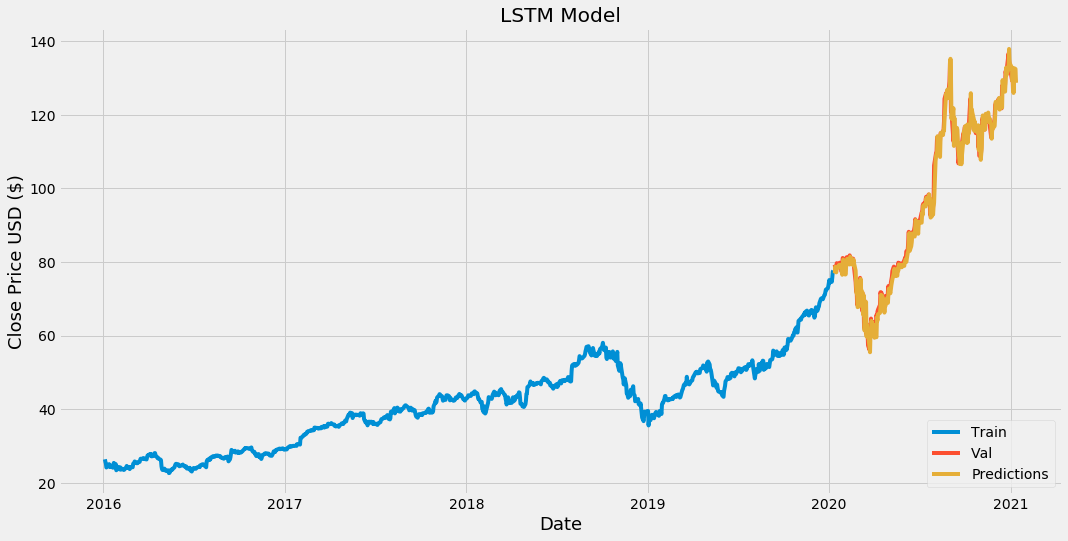

In [209]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [210]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-01-13,79.239998,76.926537
2020-01-14,78.169998,78.692818
2020-01-15,77.834999,77.425217
2020-01-16,78.809998,77.176285
2020-01-17,79.682503,78.239288
...,...,...
2021-01-06,126.599998,132.026993
2021-01-07,130.919998,125.967514
2021-01-08,132.050003,132.714874


In [211]:
# Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2016-01-01', end='2021-01-13')
# Create a new dataframe
new_df = apple_quote.filter(['Close'])
# Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the Scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[129.38033]]
